In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

makinsk kz
bonavista ca
rocha uy
illoqqortoormiut gl
port alfred za
lompoc us
vardo no
ketchikan us
pacific grove us
georgetown sh
busselton au
banda aceh id
punta arenas cl
andros town bs
yerbogachen ru
inta ru
longyearbyen sj
chuy uy
plainview us
puerto palomas mx
port alfred za
khatanga ru
port elizabeth za
deputatskiy ru
hobart au
tumannyy ru
yellowknife ca
ushuaia ar
new norfolk au
mataura pf
chokurdakh ru
kitahiroshima jp
ushuaia ar
mandali iq
new norfolk au
valky ua
san cristobal ec
rikitea pf
san alberto co
sao filipe cv
lagos pt
hermanus za
rikitea pf
rikitea pf
barentsburg sj
vaini to
tazovskiy ru
ugoofaaru mv
korla cn
ushuaia ar
taoudenni ml
kodiak us
severo-kurilsk ru
gigmoto ph
qaanaaq gl
cherskiy ru
mataura pf
carnarvon au
nikolskoye ru
oranjemund na
ushuaia ar
rabo de peixe pt
korla cn
mataura pf
bambous virieux mu
albany au
mar del plata ar
miastko pl
palmeirais br
varhaug no
san patricio mx
middelburg za
calvinia za
mar del plata ar
makakilo city us
pisco pe
cape town 

qaanaaq gl
busselton au
noumea nc
vestmannaeyjar is
rikitea pf
ati td
amderma ru
novaya lyada ru
atuona pf
mar del plata ar
atuona pf
puerto ayora ec
nikki bj
tasiilaq gl
qaanaaq gl
rikitea pf
mnogovershinnyy ru
bredasdorp za
nikolskoye ru
prachuap khiri khan th
bethel us
mrirt ma
atar mr
elizabeth city us
skagen dk
port elizabeth za
dunedin nz
hermanus za
kapaa us
esperance au
rikitea pf
fort nelson ca
vaitupu wf
qaanaaq gl
rikitea pf
kismayo so
fernandopolis br
puerto ayora ec
khatanga ru
saint-pierre pm
rikitea pf
bella union uy
coihaique cl
sortavala ru
ancud cl
mar del plata ar
qaanaaq gl
carnot cf
nanortalik gl
mattru sl
margate za
cape town za
visby se
avarua ck
puerto madero mx
cape town za
punta arenas cl
iqaluit ca
east london za
lata sb
butaritari ki
cape town za
mahebourg mu
pangnirtung ca
jizan sa
bluff nz
shirokiy ru
constitucion mx
punta arenas cl
zyryanka ru
dzilam gonzalez mx
butaritari ki
mataura pf
damietta eg
husavik is
mar del plata ar
cururupu br
rundu na
thinadho

mataura pf
bunia cd
bluff nz
ribeira grande pt
mkushi zm
fairbanks us
khatanga ru
cape town za
rikitea pf
bethel us
ancud cl
bluff nz
qaanaaq gl
bubaque gw
pangai to
chapleau ca
hobart au
shumskiy ru
ushuaia ar
bima id
saint augustine us
hobart au
lompoc us
atuona pf
atuona pf
albany au
severo-kurilsk ru
ushuaia ar
illoqqortoormiut gl
lorengau pg
road town vg
puerto ayora ec
olafsvik is
quthing ls
brigantine us
marystown ca
narsaq gl
albany au
saint-ambroise ca
coihaique cl
hasaki jp
leningradskiy ru
tokur ru
jamestown sh
albany au
saint george bm
bandar-e lengeh ir
namatanai pg
rikitea pf
vao nc
hermanus za
taolanaro mg
natal br
hilo us
taolanaro mg
hobart au
fortuna us
ahipara nz
arraial do cabo br
ushuaia ar
tiksi ru
ushuaia ar
saint-philippe re
busselton au
pevek ru
coos bay us
castro cl
katsuura jp
arlit ne
ushuaia ar
vaini to
atyashevo ru
isangel vu
taltal cl
tessalit ml
russell nz
tuim ru
peno ru
dingle ie
thompson ca
meulaboh id
ushuaia ar
ponta delgada pt
pizarro co
taolanaro 

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e5cf4fbc9b3af5b0fa80bcc36329a92


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | makinsk
Processing Record 2 of Set 1 | bonavista
Processing Record 3 of Set 1 | rocha
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | vardo
Processing Record 8 of Set 1 | ketchikan
Processing Record 9 of Set 1 | pacific grove
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | banda aceh
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | andros town
Processing Record 15 of Set 1 | yerbogachen
Processing Record 16 of Set 1 | inta
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | plainview
Processing Record 20 of Set 1 | puerto palomas
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1 | p

Processing Record 37 of Set 4 | greenville
Processing Record 38 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 39 of Set 4 | katsuura
Processing Record 40 of Set 4 | muhos
Processing Record 41 of Set 4 | rawson
Processing Record 42 of Set 4 | bargal
City not found. Skipping...
Processing Record 43 of Set 4 | tuatapere
Processing Record 44 of Set 4 | kahului
Processing Record 45 of Set 4 | victoria
Processing Record 46 of Set 4 | kambar
Processing Record 47 of Set 4 | mahibadhoo
Processing Record 48 of Set 4 | santa eulalia del rio
City not found. Skipping...
Processing Record 49 of Set 4 | quepos
Processing Record 50 of Set 4 | quatre cocos
Processing Record 1 of Set 5 | nador
Processing Record 2 of Set 5 | batu gajah
Processing Record 3 of Set 5 | barrow
Processing Record 4 of Set 5 | wilmington
Processing Record 5 of Set 5 | markova
Processing Record 6 of Set 5 | alice springs
Processing Record 7 of Set 5 | tir pol
City not found. Skipping...
Processing Record

Processing Record 23 of Set 8 | fallon
Processing Record 24 of Set 8 | miles city
Processing Record 25 of Set 8 | grand centre
City not found. Skipping...
Processing Record 26 of Set 8 | noumea
Processing Record 27 of Set 8 | vestmannaeyjar
Processing Record 28 of Set 8 | ati
Processing Record 29 of Set 8 | novaya lyada
Processing Record 30 of Set 8 | nikki
Processing Record 31 of Set 8 | mnogovershinnyy
Processing Record 32 of Set 8 | prachuap khiri khan
Processing Record 33 of Set 8 | mrirt
City not found. Skipping...
Processing Record 34 of Set 8 | atar
Processing Record 35 of Set 8 | elizabeth city
Processing Record 36 of Set 8 | skagen
Processing Record 37 of Set 8 | esperance
Processing Record 38 of Set 8 | fort nelson
Processing Record 39 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 8 | kismayo
Processing Record 41 of Set 8 | fernandopolis
Processing Record 42 of Set 8 | saint-pierre
Processing Record 43 of Set 8 | bella union
Processing Record 44 o

Processing Record 13 of Set 12 | nioro
Processing Record 14 of Set 12 | torres
Processing Record 15 of Set 12 | salamanca
Processing Record 16 of Set 12 | kunashak
Processing Record 17 of Set 12 | codrington
Processing Record 18 of Set 12 | astaneh-ye ashrafiyeh
Processing Record 19 of Set 12 | kulhudhuffushi
Processing Record 20 of Set 12 | honiara
Processing Record 21 of Set 12 | ialibu
Processing Record 22 of Set 12 | xunchang
Processing Record 23 of Set 12 | angostura
Processing Record 24 of Set 12 | tafalla
Processing Record 25 of Set 12 | idrinskoye
Processing Record 26 of Set 12 | shimoda
Processing Record 27 of Set 12 | winnemucca
Processing Record 28 of Set 12 | haapu
City not found. Skipping...
Processing Record 29 of Set 12 | balkanabat
Processing Record 30 of Set 12 | mkushi
Processing Record 31 of Set 12 | bubaque
Processing Record 32 of Set 12 | pangai
Processing Record 33 of Set 12 | chapleau
Processing Record 34 of Set 12 | shumskiy
Processing Record 35 of Set 12 | bima

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Makinsk,52.6292,70.4169,59.54,60,100,2.30,KZ,2021-08-14 19:14:32
1,Bonavista,48.6499,-53.1147,66.11,91,98,11.23,CA,2021-08-14 19:10:21
2,Rocha,-34.4833,-54.3333,55.47,91,100,5.73,UY,2021-08-14 19:14:33
3,Port Alfred,-33.5906,26.8910,58.75,74,100,13.47,ZA,2021-08-14 19:14:33
4,Lompoc,34.6391,-120.4579,93.02,60,1,9.22,US,2021-08-14 19:13:46
5,Vardo,70.3705,31.1107,49.50,83,100,3.38,NO,2021-08-14 19:10:29
6,Ketchikan,55.3422,-131.6461,62.11,84,100,5.66,US,2021-08-14 19:14:30
7,Pacific Grove,36.6177,-121.9166,91.15,84,40,5.01,US,2021-08-14 19:13:59
8,Georgetown,5.4112,100.3354,81.90,88,40,4.61,MY,2021-08-14 19:14:34
9,Busselton,-33.6500,115.3333,42.08,88,0,7.16,AU,2021-08-14 19:10:35


In [18]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign district summary df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Makinsk,KZ,2021-08-14 19:14:32,52.6292,70.4169,59.54,60,100,2.30
1,Bonavista,CA,2021-08-14 19:10:21,48.6499,-53.1147,66.11,91,98,11.23
2,Rocha,UY,2021-08-14 19:14:33,-34.4833,-54.3333,55.47,91,100,5.73
3,Port Alfred,ZA,2021-08-14 19:14:33,-33.5906,26.8910,58.75,74,100,13.47
4,Lompoc,US,2021-08-14 19:13:46,34.6391,-120.4579,93.02,60,1,9.22
...,...,...,...,...,...,...,...,...,...
559,Devils Lake,US,2021-08-14 19:14:06,48.1128,-98.8651,87.78,25,1,6.91
560,Yenagoa,NG,2021-08-14 19:14:05,4.9247,6.2642,77.45,82,100,5.46
561,Belaya Gora,RU,2021-08-14 19:17:21,68.5333,146.4167,44.24,76,100,7.63
562,Peniche,PT,2021-08-14 19:17:21,39.3558,-9.3811,78.28,90,99,15.52


In [21]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1628971159.949595

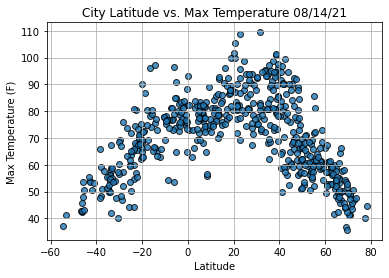

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

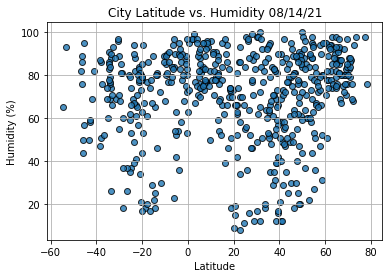

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

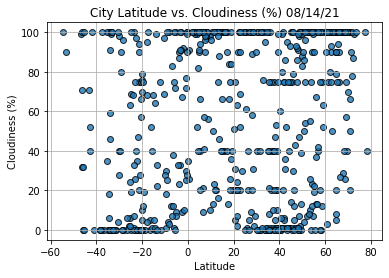

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

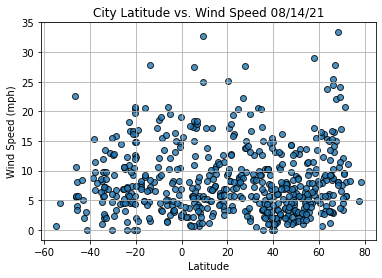

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()